### Bevægelsesligninger

Den resulterende kraft på et objekt udsat for luftmodstand i et skråt kast er

$$\mathbf{F_{objekt}} = m \mathbf{g} - \alpha | \mathbf{v} |^2 \cdot  \hat{\mathbf{v}} = m \vec{g} - \alpha | \mathbf{v} | \cdot  \mathbf{v}$$

Vi ser at kraftligningerne langs x- og y-aksen er

$$\Sigma F_x = - \alpha | \mathbf{v} | \cdot v_x = m a_x$$

$$\Sigma F_y = - m \mathbf{g} - \alpha | \mathbf{v} | \cdot  v_y = m a_y$$

Accelerationen af objektet er givet ved

$$
\mathbf{a} = \frac{d\mathbf{v}}{dt} =
\begin{bmatrix}
a_x \\
a_y \\
\end{bmatrix}
=
\begin{bmatrix}
- \frac{\alpha}{m} | \mathbf{v} | \cdot  v_x \\
- g - \frac{\alpha}{m} | \mathbf{v} | \cdot  v_y \\
\end{bmatrix}
$$



$ \mathbf{a} $ ændrer sig hele tiden, men for tilpas korte tidsintervaller $\Delta t$ er den tilnærmelsesvis konstant og svarer til gennemsnitshastigheden over tidsintervallet. Dvs. at vi kan bruge ligningen

$$ \mathbf{a} = \frac{\Delta \mathbf{v}}{\Delta t} $$

$$ \rightarrow  \Delta \mathbf{v} = \mathbf{a} \cdot \Delta t $$


Med hensyn til ændringen i objektets position ved vi at gennemsnitshastigheden over tidsintervallet er givet ved

$$ \frac{(\mathbf{v} + (\mathbf{v} + \Delta \mathbf{v}))}{2} = \\
(\mathbf{v} + \frac{\Delta \mathbf{v}}{2})$$

Eftersom $\mathbf{v}$ er hastigheden i starten af tidsintervallet og $\mathbf{v} + \Delta \mathbf{v}$ er hastigheden i slutningen af tidsintervallet.

Altså må ændringen i positionen være givet ved

$$\Delta \mathbf{s} = (\mathbf{v} + \frac{\Delta \mathbf{v}}{2}) \cdot \Delta t $$

$$ = \mathbf{v} \cdot \Delta t + \frac{\Delta \mathbf{v} \cdot \Delta t}{2} $$

$$ = \mathbf{v} \cdot \Delta t + \frac{\mathbf{a} \cdot {\Delta t}^2}{2} $$

### Implementering

Nu er vi klar til at lave simulationen. Vi starter med nogle begyndelsesbetingelser og laver en løkke der opdaterer objektets position og hastighed løbende indtil objektet rammer jorden.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Markdown as md, display_markdown

def len(vector):
    return np.linalg.norm(vector)

# Tager s_0 som et array eller en tuple
def simulate_throw(alpha, g, m, v_0, s_0, theta_0, Delta_t):
    # Startbetingelser
    t = 0
    s = np.array(s_0)
    v = v_0 * np.array([np.cos(theta_0), np.sin(theta_0)])
    
    a = np.array([0,0])

    # For at gemme objektets bevægelse i løbet af simulationen
    x_arr = []
    y_arr = []
    t_arr = []

    # Kør simulationen indtil objektet rammer jorden
    while (s[1] > 0):
        # Udregn t
        t += Delta_t

        # Udregn accelerationen
        a[0] = -(alpha/m)*len(v)*v[0]
        a[1] = -g -(alpha/m)*len(v)*v[1]

        # Udregn hastighedsændring
        v = v + a * Delta_t
        
        # Udregn positionsændring
        s = s + v * Delta_t + (a * Delta_t**2)/2

        # Gem position
        x_arr.append(s[0])
        y_arr.append(s[1])
        t_arr.append(t)

    # Skudlængde
    l = x_arr[-1]

    # Plot objektets bane
    plt.figure(1)
    plt.grid()
    plt.title("Plot over objektets bane")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.plot(x_arr, y_arr)
    plt.xlim(0, max(x_arr) + 0.5)
    plt.ylim(0, max(y_arr) + 0.5)

    return l



Vi kører simulationen for $\theta = \frac{\pi}{4} $

Skudlængden for $\theta = \frac{\pi}{4} $ er 1.90133

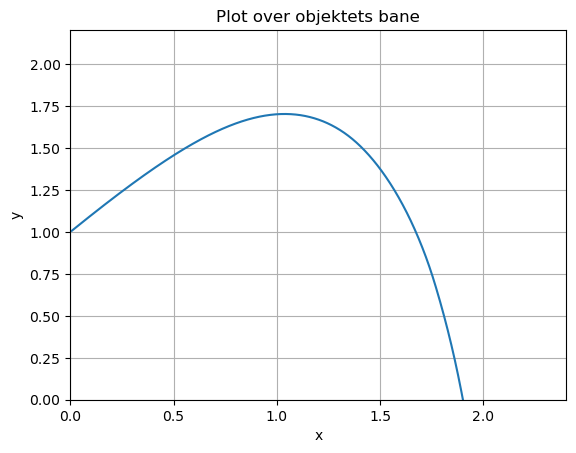

In [6]:
# Vi kalder funktionen med værdierne vi får givet i opgaven og theta = pi/4
length = simulate_throw(alpha=0.1, g=10, m=0.1, v_0=10, s_0=[0, 1], theta_0=(np.pi/4), Delta_t=0.001)

display_markdown(md(r"Skudlængden for $\theta = \frac{{\pi}}{{4}} $ er {:.5f}".format(length)))



Nu er tiden kommet til at finde vinklen der fører til den størst mulige skudlængde. Vi får at vide at vi skal teste mindst 50 forskellige vinkler.

Vi laver en funktion der tager to vinkler og leder efter vinklen med størst skudlængde inden for det interval.

Funktionen starter med at se på skudlængden for 100 jævnt fordelte vinkler i intervallet, hvorefter den tager vinklen med størst skudlængde og gør det samme for intervallet udgjort af vinklen før og efter denne vinkel. Det bliver den ved med at gøre indtil vinklerne i intervallet ligger inden for en hvis afstand af hinanden, bestemt af "spacing"-parametren.

Nu kan vi få et meget nøjagtigt resultat ved at vælge små værdier for spacing (og $\Delta t$).

Den optimale vinkel er 0.39458 radianer med end skudlængde på 2.09387


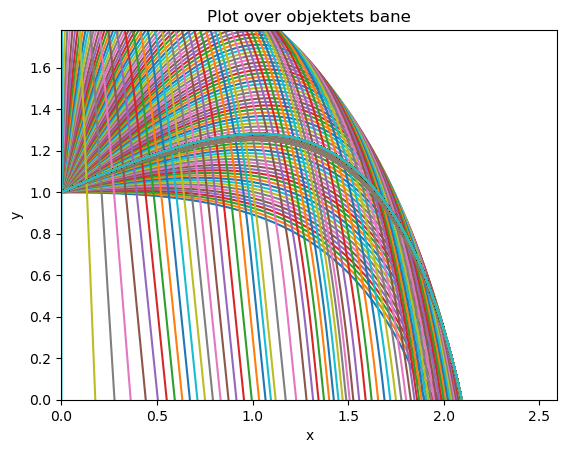

In [5]:
def findOptimalAngle(start, end, spacing, angle_Delta_t):
    # 50 jævnt fordelte vinkler i intervallet
    angles = np.linspace(start, end, 100)

    # Gemmer indeks og skudlængde for vinklen med størst skudlængde
    res = []

    for i in range(angles.size):
        # Nuværende skudlængde
        length = simulate_throw(alpha=0.1, g=10, m=0.1, v_0=10, s_0=[0, 1], theta_0=angles[i], Delta_t=angle_Delta_t)

        # Hvis det er den første vinkel vi tjekker gemmes den
        if len(res) == 0:
            res = [i, length]
        # Tekker vi om den nuværende vinkel giver en større skudlængde
        elif res[1] <= length:
            res = [i, length]

    # Returner vinklen hvis intervallet vi kigger på er småt nok
    if abs(start - end) <= spacing:
        return (angles[res[0]], res[1])
    
    # Her vælges det nye interval
    # Hvis vinklen med størst skudlængde er i enden af intervallet vi kiggede på
    # lader vi den være den nederste vinkel i det nye interval
    if res[0] == len(angles.size) - 1:
        start = res[0] - 1
        end = res[0]
    # Ellers er det nye interval stykket mellem vinklen før og efter vinklen med den største skudlængde
    else:
        start = angles[res[0] - 1]
        end = angles[res[0] + 1]

    # Hvis vi intervallet ikke er småt nok endnu fortsætter vi søgningen
    return findOptimalAngle(start, end, spacing, angle_Delta_t)
        
# Kald funktionen med startintervallet 0° til 90°, meget lav spacing og Delta_t=0.001
angle, length = findOptimalAngle(start=0, end=np.pi/2, spacing=0.0000001, angle_Delta_t=0.001)

print("Den optimale vinkel er {:.5f} radianer med end skudlængde på {:.5f}".format(angle, length))

